<center><h1>Transfer learning in image classification</h1></center>

**We will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset.**

In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [3]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

<h1>Load flowers dataset</h1>

In [7]:
data_dir =  "C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos"

In [8]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos')

In [9]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [11]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

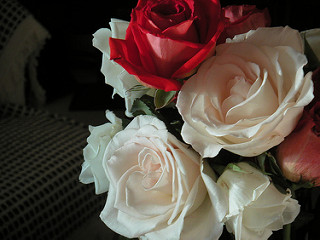

In [13]:
Image.open(str(roses[1]))

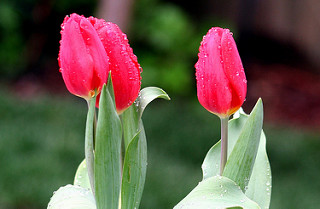

In [14]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

Read flowers images from disk into numpy array using opencv

In [15]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [17]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [18]:
str(flowers_images_dict['roses'][0])

'C:\\Users\\nduku\\OneDrive\\Documents\\03 Personal Projects\\Data Science Projects\\Deep Learning\\Convolutional Neural Network\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [19]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [20]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [21]:
X = np.array(X)
y = np.array(y)

In [22]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
 # Preprocessing: scale the images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

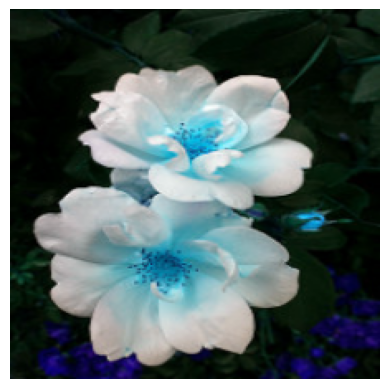

In [26]:
plt.axis('off')
plt.imshow(X[0])

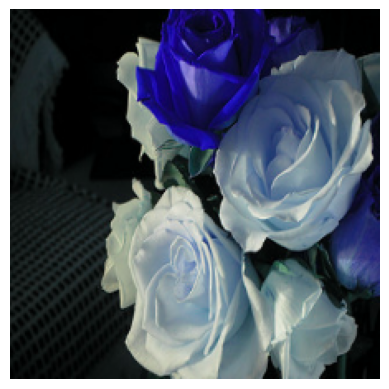

In [27]:
plt.axis('off')
plt.imshow(X[1])

In [31]:
classifier.predict(np.array([X[0],X[1]]))

1/1 [==============================] - 1s 1s/step


array([[ 0.22718725,  0.39298993,  1.4730672 , ..., -1.250792  ,
        -1.9604907 ,  3.8786242 ],
       [ 0.3045682 , -0.580562  ,  0.7134067 , ..., -1.776028  ,
        -2.332043  ,  4.3593926 ]], dtype=float32)

In [32]:
predicted = classifier.predict(np.array([X[0],X[1]]))
predicted = np.argmax(predicted, axis = 1)
predicted

1/1 [==============================] - 0s 83ms/step


array([795, 880], dtype=int64)

On the image labels 0 is a shower curtain

# Now take a pre-trained model and retrain it using flower images

In [34]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [35]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [36]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 29s 281ms/step - loss: 0.8148 - acc: 0.7042
Epoch 2/5
86/86 [==============================] - 24s 279ms/step - loss: 0.4293 - acc: 0.8517
Epoch 3/5
86/86 [==============================] - 25s 286ms/step - loss: 0.3290 - acc: 0.8884
Epoch 4/5
86/86 [==============================] - 24s 281ms/step - loss: 0.2795 - acc: 0.9070
Epoch 5/5
86/86 [==============================] - 24s 282ms/step - loss: 0.2372 - acc: 0.9277


In [37]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 9s 272ms/step - loss: 0.3653 - acc: 0.8660


[0.3653426170349121, 0.8660130500793457]